In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
accepted = pd.read_csv("accepted_2007_2011.csv")

In [52]:
accepted.set_index("id", inplace=True)

In [60]:
from sklearn.model_selection import train_test_split

loans = accepted.drop('grade',axis=1)
grade = accepted['grade']
loans_train, loans_test, grade_train, grade_test = train_test_split(loans, grade, test_size=0.2, random_state=42)

In [61]:
loans_train.shape

(31997, 55)

In [62]:
loans_test.shape

(8000, 55)

In [63]:
loans_desc = loans_train.merge(grade_train, left_index=True, right_index=True)

In [64]:
drop_no_var = ["hardship_flag", "disbursement_method", "tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
"policy_code", "collections_12_mths_ex_med", "out_prncp", "out_prncp_inv"]

In [65]:
loans_desc.drop(drop_no_var, axis=1, inplace = True)

In [66]:
loans_desc.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag,grade
id,,,,,,,,,,,,,,,,,,,,,
981750,35000.0,35000.0,35000.000000,60 months,20.30,933.14,E5,LIK Managment,2 years,MORTGAGE,...,0.000000,17.76,0.0000,933.14,2019-03-01,549.0,545.0,0.0,N,E
750093,20000.0,20000.0,20000.000000,60 months,16.89,495.87,D4,MultiCare,10+ years,OWN,...,0.000000,1.06,0.0000,74.93,2014-02-01,589.0,585.0,0.0,N,D
886824,21000.0,21000.0,19875.000000,60 months,18.64,540.61,E1,"Aetna, Inc",10+ years,MORTGAGE,...,0.000000,0.00,0.0000,20443.68,2012-03-01,724.0,720.0,0.0,N,E
551238,30000.0,30000.0,28364.692052,60 months,18.99,778.06,F3,OneBeacon Insurance Group,5 years,MORTGAGE,...,38.895205,2405.43,24.0172,431.49,2018-10-01,614.0,610.0,0.0,N,F
428826,25000.0,25000.0,17371.065035,36 months,16.00,878.94,E2,Johnson & Johnson,10+ years,MORTGAGE,...,0.000000,0.00,0.0000,20710.14,2017-02-01,649.0,645.0,0.0,N,E


In [81]:
loans_desc[loans_desc["loan_amnt"] != loans_desc["funded_amnt"]]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag,grade
id,,,,,,,,,,,,,,,,,,,,,
577213,20000.0,12350.0,11909.828342,60 months,6.54,241.88,A4,Percy Hoek Inc,10+ years,OWN,...,0.0,0.00,0.0000,2180.85,2015-03-01,764.0,760.0,0.0,N,A
623668,20000.0,12200.0,10098.117743,36 months,6.17,372.09,A3,Boston University,3 years,RENT,...,0.0,0.00,0.0000,7828.53,2014-07-01,759.0,755.0,0.0,N,A
855246,18000.0,16500.0,16475.000000,60 months,15.23,394.53,C5,Jones Day,10+ years,RENT,...,0.0,0.00,0.0000,8553.99,2019-02-01,729.0,725.0,0.0,N,C
517686,14000.0,8725.0,8513.650716,60 months,7.51,174.88,A4,Peninsula Counseling Center,10+ years,MORTGAGE,...,0.0,0.00,0.0000,181.29,2016-02-01,789.0,785.0,0.0,N,A
566807,24000.0,14525.0,14448.260000,60 months,16.32,355.70,D5,Direct Brands,6 years,MORTGAGE,...,0.0,0.00,0.0000,371.61,2015-09-01,614.0,610.0,0.0,N,D
607728,12000.0,6825.0,6825.000000,36 months,6.54,209.31,A4,Raymond James Financial,10+ years,MORTGAGE,...,0.0,0.00,0.0000,2843.07,2016-12-01,699.0,695.0,0.0,N,A
800184,35000.0,23650.0,22124.794888,60 months,19.69,622.51,E5,U.S. Army,6 years,MORTGAGE,...,0.0,0.00,0.0000,10936.01,2016-12-01,829.0,825.0,0.0,N,E
347512,7500.0,5050.0,867.090000,36 months,9.76,162.39,B2,MicahTek Inc,5 years,RENT,...,0.0,0.00,0.0000,162.64,2012-02-01,739.0,735.0,0.0,N,B
836299,35000.0,22100.0,21825.000000,60 months,11.49,485.93,B4,united parcel service,10+ years,RENT,...,0.0,0.00,0.0000,8171.28,2019-01-01,739.0,735.0,0.0,N,B


In [68]:
loans_desc["grade"].value_counts()

B    9392
A    7654
C    6637
D    4490
E    2518
F     951
G     355
Name: grade, dtype: int64

In [69]:
loans_desc["term"].value_counts()

 36 months    23439
 60 months     8558
Name: term, dtype: int64

([<matplotlib.patches.Wedge at 0x1193a86a0>,
 [Text(-0.7339974370447289, 0.8192971148562466, '36 months'),
  Text(0.7339975137528578, -0.819297046134443, '60 months')])

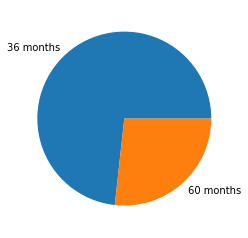

In [77]:
plt.pie(loans_desc["term"].value_counts(), labels = ["36 months", "60 months"])

In [70]:
loans_desc["home_ownership"].value_counts()

RENT        15238
MORTGAGE    14301
OWN          2356
OTHER         102
Name: home_ownership, dtype: int64

([<matplotlib.patches.Wedge at 0x1193d9fd0>,
 [Text(0.08205952071881488, 1.0969349274498459, 'Rent'),
  Text(-0.34184925197122945, -1.0455329210152644, 'Mortgage'),
  Text(1.0654350049382746, -0.2735840826001743, 'Own'),
  Text(1.0999448369527087, -0.011016154550452817, 'Other')])

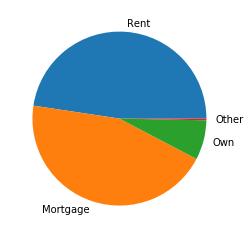

In [78]:
plt.pie(loans_desc["home_ownership"].value_counts(), labels = ["Rent", "Mortgage", "Own", "Other"])

In [73]:
loans_desc["emp_length"].value_counts()

10+ years    7323
< 1 year     3803
2 years      3675
3 years      3368
4 years      2800
5 years      2718
1 year       2689
6 years      1859
7 years      1470
8 years      1250
9 years      1042
Name: emp_length, dtype: int64

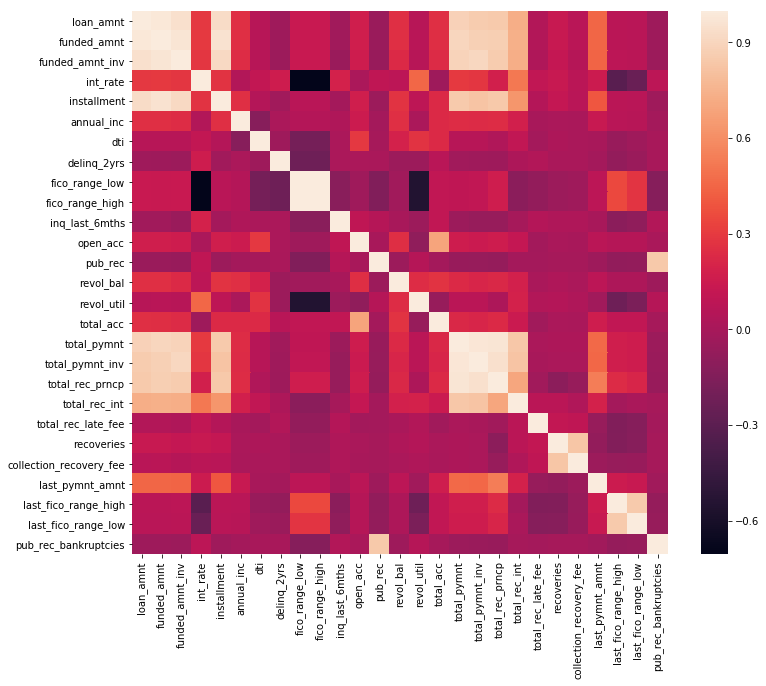

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(loans_desc.corr())